### descriptive stats of pat_76_06_assg


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib.colors import LogNorm

%matplotlib inline

In [5]:
%%time
# read in main data file in the Strata9 .dta format
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')


CPU times: user 1min 11s, sys: 7.71 s, total: 1min 18s
Wall time: 1min 21s


In [6]:
# get details of a particular patent
pat76_06_assg_df[pat76_06_assg_df.patent == 3930290].T

,20
allcites,5
appyear,1974
asscode,1
assgnum,NaN
cat,5
cat_ocl,6
cclass,114/108
country,
ddate,NaT
gday,6


In [7]:
icl_uc = pat76_06_assg_df.icl.apply(lambda x: x.upper())
icl_class_uc = pat76_06_assg_df.icl_class.apply(lambda x: x.upper())

pat76_06_assg_df['icl_uc'] = icl_uc
pat76_06_assg_df['icl_class_uc'] = icl_class_uc

In [8]:
pat76_06_assg_df.head().T

,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [9]:
pat76_06_assg_df[pat76_06_assg_df.patent==4079375].T

,150459
allcites,4
appyear,1976
asscode,1
assgnum,NaN
cat,2
cat_ocl,2
cclass,342/28
country,
ddate,NaT
gday,14


In [10]:
# get number of unique patents
groupedby_patent = pat76_06_assg_df.groupby(by='patent')
groupedby_patent = pd.DataFrame(groupedby_patent.size().reset_index(name = "Group_Count"))
groupedby_patent_sorted = groupedby_patent.sort_values(by='Group_Count', ascending=False)
groupedby_patent_sorted.head()
len(groupedby_patent_sorted)

3210361

In [11]:
# check for above cell
len(pat76_06_assg_df.patent.unique())

3210361

In [12]:
# get number of unique assignees

# note that is some of the above, there are pdpass values which are NaN. These
# appear to be for lone inventor/assignee people. Remove these:
pat76_06_assg_df_valid_pdpass = pat76_06_assg_df[pat76_06_assg_df.pdpass.notnull()].copy()
#and convert the float set pdpass (from read_stata) to integer
pat76_06_assg_df_valid_pdpass.pdpass = pat76_06_assg_df_valid_pdpass.pdpass.astype(int)
groupedby_assignees = pat76_06_assg_df_valid_pdpass.groupby(by='pdpass')

groupedby_assignees = pd.DataFrame(groupedby_assignees.size().reset_index(name = "Group_Count"))
groupedby_assignees_sorted = groupedby_assignees.sort_values(by='Group_Count', ascending=False)
groupedby_assignees_sorted.head()
print('number unique assignees  = ',len(groupedby_assignees_sorted))


number unique assignees  =  223958


In [13]:
# check number for above cell

print('number unique assignees  = ',len(pat76_06_assg_df_valid_pdpass.pdpass.unique()))


number unique assignees  =  223958


In [14]:
pat76_06_assg_df_no_pdpass = pat76_06_assg_df[pat76_06_assg_df.pdpass.isnull()].copy()



In [15]:
# look at those patents with no assignee number, i.e. lone inventor.
print('number rows with "nan" assignee = ',len(pat76_06_assg_df_no_pdpass))
print('number unique patents with lone inventor = ',len(pat76_06_assg_df_no_pdpass.patent.unique()))
pat76_06_assg_df_no_pdpass.sort_values(by='allcites', ascending=False).head().T

number rows with "nan" assignee =  505557
number unique patents with lone inventor =  505557


,1664704,579214,488210,588101,32554
allcites,756,583,565,497,497
appyear,1995,1983,1982,1983,1973
asscode,1,1,1,1,1
assgnum,NaN,NaN,NaN,NaN,NaN
cat,2,3,6,3,6
cat_ocl,2,NaN,6,3,6
cclass,709/218,623/1.19,206/770,606/108,428/40.1
country,,,,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,5,12,8,23,8


In [16]:
# get list of firms with most patents
groupedby_assignees_sorted.head()

,pdpass,Group_Count
5375,10083419,45146
395,10033664,31975
13479,10180289,28356
31691,10446448,26188
1789,10045727,23727


In [17]:
# reset index and get number of assignees with only one patent
groupedby_assignees_sorted.reset_index(drop=True)
len(groupedby_assignees_sorted[groupedby_assignees_sorted.Group_Count==1])

122771

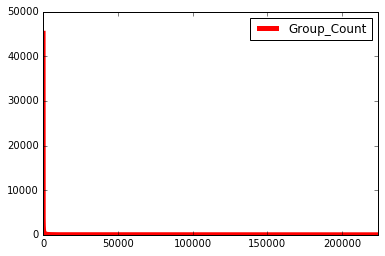

In [18]:
# plot number of patents for each assignee
#aa.plot(y='Group_Count',c='r',xlim=(-500,2516968),linewidth=5)
groupedby_assignees_sorted_reindexed = groupedby_assignees_sorted.reset_index()
groupedby_assignees_sorted_reindexed.plot(y='Group_Count',c='r',linewidth=5)

In [19]:
groupedby_assignees_sorted_reindexed.tail()

,index,pdpass,Group_Count
223953,35423,10503528,1
223954,124063,11838232,1
223955,124062,11838221,1
223956,35425,10503540,1
223957,223957,162132622,1


In [20]:
logx = np.log10(groupedby_assignees_sorted_reindexed.index[1:]) 
logy = np.log10(groupedby_assignees_sorted_reindexed.Group_Count[1:]) 

print(len(logx))
print(len(logy))

223957
223957


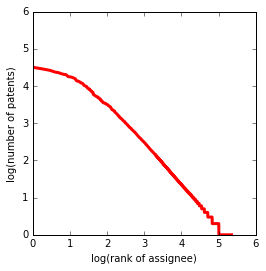

In [21]:
# plot data
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'r',linewidth=3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of assignee)", ylabel="log(number of patents)")
plt.show()

In [22]:
# create dataframe from log values
# as this may help get them into a regression
logged_df = pd.DataFrame({'logx':logx, 'logy':logy})


In [23]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
trainX = np.asarray(logged_df.logx[100:]).reshape(-1, 1)
trainY = np.asarray(logged_df.logy[100:]).reshape(-1, 1)
testX = np.asarray(logged_df.logx).reshape(-1, 1)
testY = np.asarray(logged_df.logy).reshape(-1, 1)
linear.fit(trainX, trainY)
linear.score(trainX, trainY)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R² Value: \n', linear.score(trainX, trainY))
predicted = linear.predict(trainX)
linear.fit(trainX, trainY)

Coefficient: 
 [[-1.09056433]]
Intercept: 
 [ 5.67909785]
R² Value: 
 0.968160740552


/Users/ahuxor/.local/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

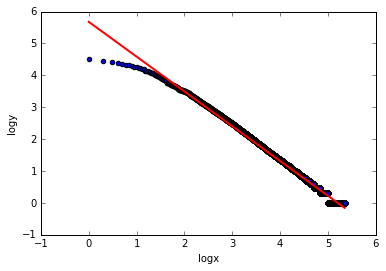

In [24]:


logged_df.plot('logx', 'logy', kind='scatter')

plt.plot(testX, linear.predict(testX), color='red', linewidth=2)
# plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/allcites_year_plot.pdf", bbox_inches = 'tight')

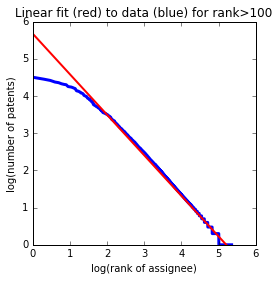

In [25]:
# genrate plot for thesis figure
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,color ='b',linewidth=3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
plt.plot(testX, linear.predict(testX), color='red', linewidth=2)
ax.set(title="Linear fit (red) to data (blue) for rank>100", xlabel="log(rank of assignee)", ylabel="log(number of patents)")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/log_rank_log_patents_plus_fit.pdf", bbox_inches = 'tight')
plt.show()

In [26]:
# get unique icl_class (IPC4), using upper case version to avoid lc/uc duplicates
groupedby_icl_class = pat76_06_assg_df.groupby(by='icl_class_uc')
groupedby_icl_class = pd.DataFrame(groupedby_icl_class.size().reset_index(name = "Group_Count"))
groupedby_icl_class_sorted = groupedby_icl_class.sort_values(by='Group_Count', ascending=False)
groupedby_icl_class_sorted.head()
len(groupedby_icl_class_sorted)

3940

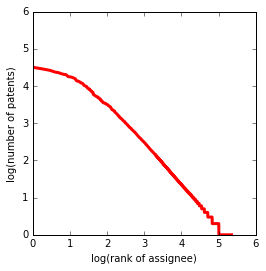

In [27]:
# plot data
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'r',linewidth=3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of assignee)", ylabel="log(number of patents)")
plt.show()

In [28]:
groupedby_icl_class_sorted.head(7)

,icl_class_uc,Group_Count
2822,G06F,150070
3178,H01L,119122
494,A61K,98538
2728,G01N,54801
485,A61B,50489
990,B32B,48739
2742,G02B,48034


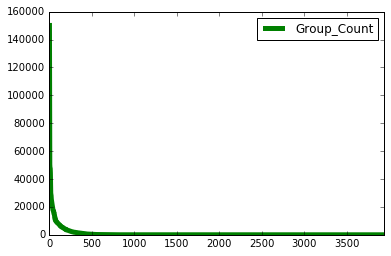

In [29]:
# plot number of icl_class 
#aa.plot(y='Group_Count',c='r',xlim=(-500,2516968),linewidth=5)
groupedby_icl_class_sorted_reindexed = groupedby_icl_class_sorted.reset_index()
groupedby_icl_class_sorted_reindexed.plot(y='Group_Count',c='g',linewidth=5)

In [30]:
logx = np.log10(groupedby_icl_class_sorted_reindexed.index[1:]) 
logy = np.log10(groupedby_icl_class_sorted_reindexed.Group_Count[1:]) 

print(len(logx))
print(len(logy))

3939
3939


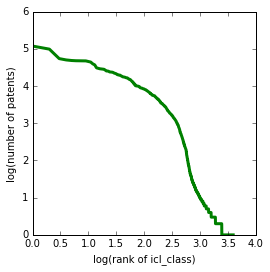

In [31]:
# plot data
# very unlike a power-law
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'g',linewidth=3)
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of icl_class)", ylabel="log(number of patents)")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/log_rank_iclclass_log_patents.pdf", bbox_inches = 'tight')

plt.show()

In [32]:
# get unique icl (full) (IPC4), using upper case version to avoid lc/uc duplicates
groupedby_icl = pat76_06_assg_df.groupby(by='icl_uc')
groupedby_icl = pd.DataFrame(groupedby_icl.size().reset_index(name = "Group_Count"))
groupedby_icl_sorted = groupedby_icl.sort_values(by='Group_Count', ascending=False)
groupedby_icl_sorted.head()
len(groupedby_icl_sorted)

140455

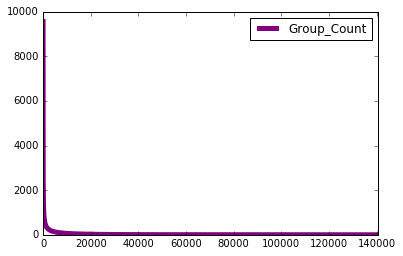

In [33]:
# plot number of icl_class 
#aa.plot(y='Group_Count',c='r',xlim=(-500,2516968),linewidth=5)
groupedby_icl_sorted_reindexed = groupedby_icl_sorted.reset_index()
groupedby_icl_sorted_reindexed.plot(y='Group_Count',c='purple',linewidth=5)

In [34]:
groupedby_icl_sorted_reindexed.head()


,index,icl_uc,Group_Count
0,113403,G06F 1300,9552
1,113675,G06F 1730,8070
2,119012,G11C 700,7469
3,72621,C12Q 168,6779
4,114549,G06K 900,6263


In [35]:
groupedby_icl_sorted_reindexed.tail()


,index,icl_uc,Group_Count
140450,86729,F01K 25/02,1
140451,26665,B23F 508,1
140452,26661,B23F 314,1
140453,26660,B23F 312,1
140454,140454,Z10G 4508,1


In [36]:
temp = groupedby_icl_sorted_reindexed[['icl_uc','Group_Count']].head()
print(temp.to_latex())

\begin{tabular}{llr}
\toprule
{} &     icl\_uc &  Group\_Count \\
\midrule
0 &  G06F 1300 &         9552 \\
1 &  G06F 1730 &         8070 \\
2 &  G11C  700 &         7469 \\
3 &  C12Q  168 &         6779 \\
4 &  G06K  900 &         6263 \\
\bottomrule
\end{tabular}



In [37]:
logx = np.log10(groupedby_icl_sorted_reindexed.index[1:]) 
logy = np.log10(groupedby_icl_sorted_reindexed.Group_Count[1:]) 

print(len(logx))
print(len(logy))

140454
140454


In [38]:
x = groupedby_icl_sorted_reindexed.index
y = groupedby_icl_sorted_reindexed.Group_Count

print(len(x))
print(len(y))

140455
140455


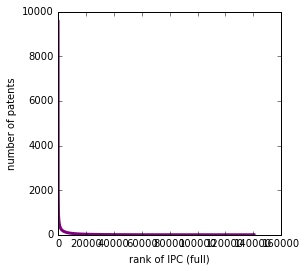

In [39]:
# plot data
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'purple',linewidth=3)
#ax.set_xlim(0, 6)
#ax.set_ylim(0, 6)
ax.set(title="", xlabel="rank of IPC (full)", ylabel="number of patents")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/rank_iclFull_log_patents.pdf", bbox_inches = 'tight')

plt.show()

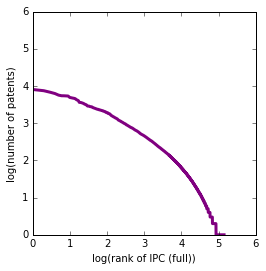

In [40]:
# plot data
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'purple',linewidth=3)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of IPC (full))", ylabel="log(number of patents)")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/log_rank_iclFull_log_patents.pdf", bbox_inches = 'tight')

plt.show()

In [41]:
# concat icl and icl_maingroup to get intermediate representation between the full IPC and the IPC4
pat76_06_assg_df.head().T


,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [42]:
# create data from concating the icl_class (upper case version) and icl_maingroup
ipc_inter = pat76_06_assg_df.icl_class_uc.values + pat76_06_assg_df.icl_maingroup.values.astype(int).astype(str)

In [43]:
# add this new intermediate IPC code to the df
pat76_06_assg_df['ipc_inter'] = ipc_inter

In [44]:
# get new intermediate IPC intermediate codes
groupedby_ipc_inter = pat76_06_assg_df.groupby(by='ipc_inter')
groupedby_ipc_inter = pd.DataFrame(groupedby_ipc_inter.size().reset_index(name = "Group_Count"))
groupedby_ipc_inter_sorted = groupedby_ipc_inter.sort_values(by='Group_Count', ascending=False)
groupedby_ipc_inter_sorted.head()
len(groupedby_ipc_inter_sorted)

20841

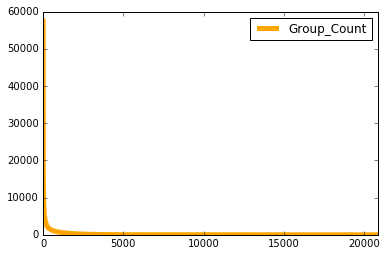

In [45]:
# plot number of ipc_inter
groupedby_ipc_inter_sorted_reindexed = groupedby_ipc_inter_sorted.reset_index()
groupedby_ipc_inter_sorted_reindexed.plot(y='Group_Count',c='orange',linewidth=5)

In [46]:
logx = np.log10(groupedby_ipc_inter_sorted_reindexed.index[1:]) 
logy = np.log10(groupedby_ipc_inter_sorted_reindexed.Group_Count[1:]) 

print(len(logx))
print(len(logy))

20840
20840


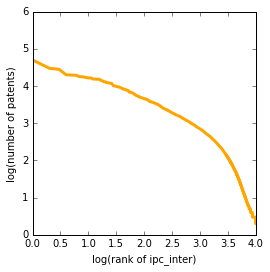

In [47]:
# plot data
# very unlike a power-law
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'orange',linewidth=3)
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of ipc_inter)", ylabel="log(number of patents)")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/log_rank_ipcinter_log_patents.pdf", bbox_inches = 'tight')

plt.show()

In [48]:
groupedby_ipc_inter_sorted_reindexed.head()

,index,ipc_inter,Group_Count
0,18463,H01L21,57467
1,2373,A61K31,50437
2,16657,G06F15,30138
3,16659,G06F17,28202
4,16017,G02B6,20071


In [49]:
# It looks as if many of the single ones are mis-recognitions of actual codes
groupedby_ipc_inter_sorted_reindexed.tail(20)

,index,ipc_inter,Group_Count
20821,9970,C09S95,1
20822,9971,C09T3,1
20823,9974,C09W11,1
20824,9975,C09X3,1
20825,9976,C09Y7,1
20826,9977,C09Z11,1
20827,9978,C0BF83,1
20828,9979,C0BL75,1
20829,9983,C10B13,1
20830,9995,C10B34,1


In [50]:
# Get those ipc_inter thatonly have one patent.
# It looks as if many of these may be typos or other problems in the data.
only_one_ipc_inter = groupedby_ipc_inter_sorted_reindexed[groupedby_ipc_inter_sorted_reindexed.Group_Count==1]
over_one_ipc_inter = groupedby_ipc_inter_sorted_reindexed[groupedby_ipc_inter_sorted_reindexed.Group_Count>1]


print('length of only_one_ipc_inter = ',len(only_one_ipc_inter))
only_one_ipc_inter[1000:1020]

length of only_one_ipc_inter =  8528


,index,ipc_inter,Group_Count
13313,20548,N05B33,1
13314,20549,N05K1,1
13315,20551,N22C13,1
13316,20559,N61F5,1
13317,20552,N23P19,1
13318,20553,N41D19,1
13319,20554,N46D1,1
13320,20555,N47B88,1
13321,20556,N60R9,1
13322,20557,N61C17,1


In [51]:
# Check certain ipc codes that seem wrong, get patent number and check
pat76_06_assg_df[pat76_06_assg_df.icl_class=='C09X'].patent.values

array([5923044], dtype=int32)

In [52]:
# remove those ipc_inters from the main pat76_06_assg_df datafile
# for subsequent work with ipc classes.
to_drop = only_one_ipc_inter.ipc_inter.values

In [53]:
#df[~df['title'].isin(to_drop)]
pat76_06_assg_minus_singular_ipc_inter_df = pat76_06_assg_df[~pat76_06_assg_df['ipc_inter'].isin(to_drop)]

In [54]:
len(pat76_06_assg_minus_singular_ipc_inter_df)

3270981

In [55]:
len(pat76_06_assg_df)

3279509

In [56]:
pat76_06_assg_minus_singular_ipc_inter_df.head().T

,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [57]:
# repeat above, but for sample with possible corrupted single ipc_inter values removed (i.e. more than one patent)
logx = np.log10(over_one_ipc_inter.index[1:]) 
logy = np.log10(over_one_ipc_inter.Group_Count[1:]) 

print(len(logx))
print(len(logy))

12312
12312


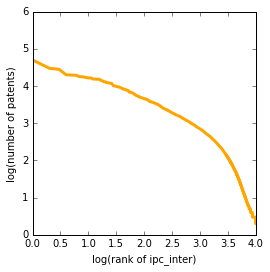

In [58]:
# plot data
# very unlike a power-law
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(logx,logy,'orange',linewidth=3)
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set(title="", xlabel="log(rank of ipc_inter)", ylabel="log(number of patents)")
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/log_rank_ipcinter_log_patents.pdf", bbox_inches = 'tight')

plt.show()

In [59]:
# now quickly save this edited dataframe with new upper case version and ipc_inter
# and with the only one ipc_inter, the possible types

pat76_06_assg_minus_singular_ipc_inter_df.to_csv('pat76_06_assg_minus_singular_ipc_inter.csv', index=False)